<div>
    <img style="float:right; width:210px" src="images/snext-logo.png"/>
    <div style="float:left;"><h1>Introduction to Python for Data Science</h1></div>
</div>

---
# Notebook 4: Transfer Task
This notebook introduces the instructions for the transfer task you have to complete for the module "Digital Infrastructure & Software Development"


Introduction: In my research, I have focused on the topic of environmental pollution and changes in air purity based on various parameters. The activities and use of fireworks and firecrackers mainly produce fine dust particles Pm25 and Pm10, which were therefore of crucial importance within my research and were investigated. The study covered a period from 30 December 2024 to the second of January 2025 for the major German cities of Berlin and Stuttgart. The period was explicitly chosen so that the actual status before New Year's Eve and the actual status after New Year's Eve could be assessed and analysed. At the same time, the chosen time period shows whether the fireworks actually have a decisive and measurable impact on air purity in the selected cities. 
Based on this, the research question arose: How high was the environmental pollution based on air purity, measured by the values ‘pm25’, ‘pm10’, in the major cities of Berlin and Stuttgart in the period from 30th December 2024 to 2nd January 2025?



Data Retrieval:My Python script analyzes air pollution in Berlin and Stuttgart from December 30, 2024, to January 2, 2025, focusing on particulate matter (PM2.5 and PM10). It uses the OpenAQ API to fetch air quality data and processes it for further analysis or visualization. The script begins by defining the date range, target cities, and API details, including a key for authentication and endpoint configuration. An empty DataFrame is initialized to aggregate data.
For each city, the script makes numbered API requests to retrieve measurements. Parameters such as date range, city name, and pollutants are specified for each request. The script handles pagination to ensure all available data is collected, retrieving up to 1,000 records per page. The JSON responses are converted into a panda DataFrame, and timestamps are standardized to UTC format. Metadata like city name is added to the DataFrame for identification. The data is concatenated into the main DataFrame, which stores combined results for both cities.
Error handling is implemented to report issues, such as unsuccessful requests, with detailed status codes and messages. While the script imports matplotlib and seaborn for visualization, no plots are generated in this snippet. The final output is a consolidated dataset containing pollution measurements for Berlin and Stuttgart during the specified period.


In [4]:
print("How high was the environmental pollution based on air purity, measured by the values pm25 and pm10 fpr the major cities of Berlin in Stuttgart in the period of 30th December 2024 until 2nd January 2025?")

import requests
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Define the date range for the data (for the year 2024 to 2025)
start_date = "2024-12-30"
end_date = "2025-01-02"

# API Key for OpenAQ API
api_key = "28afd69202abaa22b7faf9c0c9f25db0608ab98ebe848f47dcf57040293fb9f6"

# Base URL for OpenAQ API
url = "https://api.openaq.org/v2/measurements"

# Cities to fetch data for
cities = ["Stuttgart", "Berlin"]

# Create an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Loop through each city and fetch data
for city in cities:
    print(f"Fetching data for {city}...")
    page = 1
    while True:
        params = {
            "date_from": start_date,
            "date_to": end_date,
            "limit": 1000,
            "page": page,
            "city": city,
            "parameter[]": ["pm25", "pm10"]  # Specify relevant parameters
        }

        # Send the request to the API
        response = requests.get(url, headers={"X-API-Key": api_key}, params=params)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()

            # Flatten the JSON data into a DataFrame
            df = json_normalize(data["results"])

            # If no data is returned, break the loop
            if df.empty:
                break

            # Parse UTC dates and clean up the DataFrame
            if "date.utc" in df.columns:
                df["datetime.utc"] = pd.to_datetime(df["date.utc"])
                df.set_index("datetime.utc", inplace=True)
                df.drop(columns=[col for col in ["date.local", "date.utc"] if col in df.columns], inplace=True)

            # Add city information to the DataFrame
            df["city"] = city

            # Combine the data into the main DataFrame
            combined_df = pd.concat([combined_df, df])

            # Increment the page number for the next request
            page += 1
        else:
            print(f"Failed to fetch data for {city}. Status code: {response.status_code}, Error: {response.text}")
            break


How high was the environmental pollution based on air purity, measured by the values pm25 and pm10 fpr the major cities of Berlin in Stuttgart in the period of 30th December 2024 until 2nd January 2025?
Fetching data for Stuttgart...
Fetching data for Berlin...


Data processing and cleaning: My Python code refines and augments the dataset by cleaning and processing air quality data. It first ensures the data is chronologically ordered by sorting the combined DataFrame by the datetime.utc index. Numeric values are then rounded to two decimal places for standardization. Mean pollution values for each parameter (PM2.5 and PM10) are calculated, grouped by city, and stored in a separate DataFrame with renamed columns for clarity.
To integrate the mean values into the original dataset, placeholder UTC timestamps are assigned to the mean records, and a new column, mean, is added to label these rows. The mean values are then appended to the cleaned dataset, creating a consolidated DataFrame that includes both individual measurements and aggregated statistics.
Finally, the complete dataset is re-sorted by datetime.utc to maintain chronological order, enabling seamless analysis or visualization. This process improves the dataset's usability, making it easier to analyze temporal trends and compare average pollution levels across cities.


In [5]:
# Sort the combined DataFrame by datetime
combined_df.sort_index(inplace=True)

# Round all relevant values to 2 decimal places
rounded_df = combined_df.round(2)

print (rounded_df)

# Calculate mean values for each parameter grouped by city
mean_values = rounded_df.groupby(['city', 'parameter'])['value'].mean().reset_index()

# Rename the 'value' column to indicate these are mean values
mean_values.rename(columns={'value': 'mean_value'}, inplace=True)

# Create a new column to indicate these are mean values

mean_values['datetime.utc'] = pd.to_datetime('2024-12-30').tz_localize('UTC')  # Use a placeholder date for mean values

mean_values['mean'] = True  # Indicate that these are mean values

# Append the mean values to the original DataFrame

# Ensure that the columns match; if necessary, reorder or rename columns

combined_df_with_means = pd.concat([rounded_df, mean_values], ignore_index=True, sort=False)


# Sort the combined DataFrame by datetime again if needed

combined_df_with_means.sort_values(by='datetime.utc', inplace=True)


                           locationId                      location parameter  \
datetime.utc                                                                    
2024-12-30 01:00:00+00:00     2162180    Berlin Karl-Marx-Straße II       no2   
2024-12-30 01:00:00+00:00        4567        Stuttgart Am Neckartor      pm10   
2024-12-30 01:00:00+00:00        2936       Stuttgart-Bad Cannstatt       no2   
2024-12-30 01:00:00+00:00        4582      Berlin Grunewald (3.5 m)      pm25   
2024-12-30 01:00:00+00:00        4767      Berlin Frankfurter Allee       no2   
...                               ...                           ...       ...   
2025-01-02 00:00:00+00:00        4613  Stuttgart Arnulf-Klett-Platz      pm10   
2025-01-02 00:00:00+00:00     2162181    Berlin Silbersteinstraße 5       no2   
2025-01-02 00:00:00+00:00        4763            Berlin Marienfelde        o3   
2025-01-02 00:00:00+00:00     2162178  Berlin Leipziger Straße (MC)      pm10   
2025-01-02 00:00:00+00:00   

Visualisation:I was able to produce to separate bar charts which shows the pollution levels based on µg/m³ on the y-achsis and the timeframe with date and time on the x-achsis. First, I created one for the pollution level of pm25 afterwards one for the pollution level of pm10. To sum up I wanted to see how high are the pollution levels overall in Stuttgart and Berlin with other parameters during the defined period. I took the mean values as data basis to generate a bar chart for the parameters of co, no2, o3, pm10 and pm25.

      locationId                      location parameter  value   unit  \
4578         NaN                           NaN        co    NaN    NaN   
4579         NaN                           NaN       no2    NaN    NaN   
4580         NaN                           NaN        o3    NaN    NaN   
4581         NaN                           NaN      pm10    NaN    NaN   
4582         NaN                           NaN      pm25    NaN    NaN   
...          ...                           ...       ...    ...    ...   
4573      4613.0  Stuttgart Arnulf-Klett-Platz      pm10  21.30  µg/m³   
4574   2162181.0    Berlin Silbersteinstraße 5       no2   7.92  µg/m³   
4575      4763.0            Berlin Marienfelde        o3  63.65  µg/m³   
4576   2162178.0  Berlin Leipziger Straße (MC)      pm10   8.97  µg/m³   
4577      3178.0  Stuttgart Hohenheimer Straße       no2  11.47  µg/m³   

     country       city isMobile isAnalysis                     entity  \
4578     NaN     Berlin      NaN     

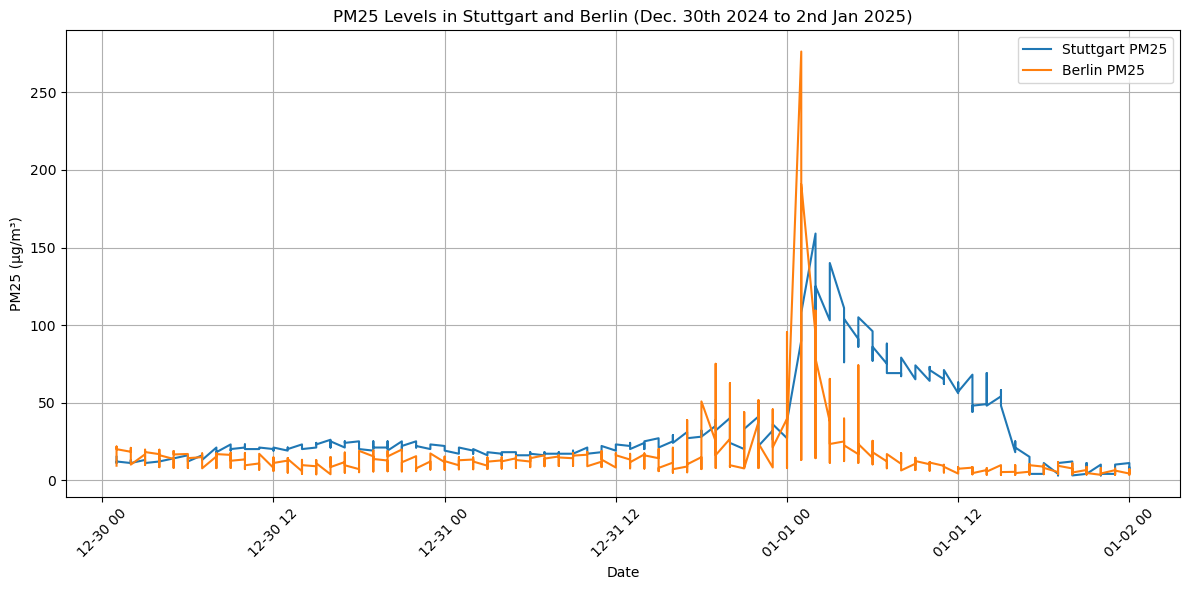

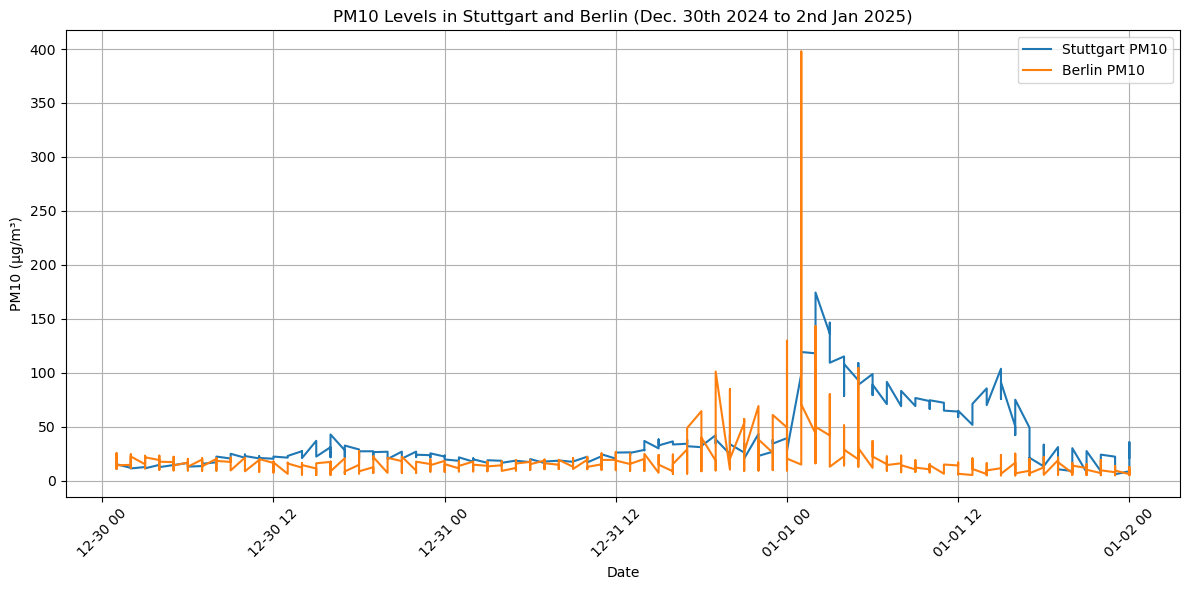

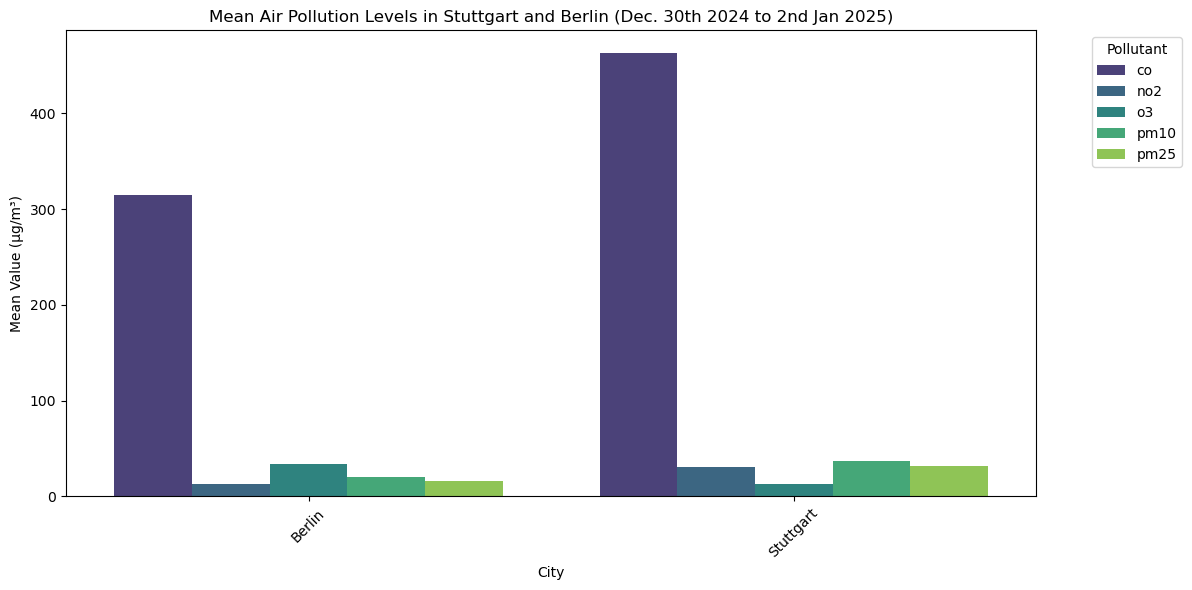

In [6]:
# Display the updated DataFrame with mean values

print(combined_df_with_means)

plt.figure(figsize=(12, 6))  
for city in cities:
    city_data = rounded_df[(rounded_df['city'] == city) & (rounded_df['parameter'] == 'pm25')]
    plt.plot(city_data.index, city_data['value'], label=f'{city} PM25')

plt.title('PM25 Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('Date')
plt.ylabel('PM25 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.grid() 
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))  
for city in cities:
    city_data = rounded_df[(rounded_df['city'] == city) & (rounded_df['parameter'] == 'pm10')]
    plt.plot(city_data.index, city_data['value'], label=f'{city} PM10')

plt.title('PM10 Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.grid() 
plt.tight_layout()
plt.show()

# Create a bar plot for mean values
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_values, x='city', y='mean_value', hue='parameter', palette='viridis')

# Customize the plot
plt.title('Mean Air Pollution Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('City')
plt.ylabel('Mean Value (µg/m³)')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Summary and Conclusion: The analysis successfully answered the research question about the level of environmental pollution caused by PM10 and PM25 particles on New Year's Eve in Berlin and Stuttgart. The results highlight the significant impact of fireworks on air quality, especially during the peak activity at midnight on 1 January 2025.

In Stuttgart, PM25 concentrations rose from around 25 µg/m³ at midday on 31 December to around 160 µg/m³ at midnight - a more than six-fold increase. Similarly, PM10 levels rose from around 40 µg/m³ to 170 µg/m³ in the same period. In Berlin, the increase was even more significant. PM25 levels rose from 20µg/m³ to 280µg/m³, a huge increase of 260µg/m³, while PM10 levels climbed from 20µg/m³ to almost 400µg/m³, an increase of around 380µg/m³.

An interesting result is the slower reallocation of pollutants in Stuttgart. The city's particular geographical location in a valley hinders the natural spread of particles due to the limited air flow and stable conditions. As a result, pollutant levels in Stuttgart remain high for longer than in Berlin, where flatter terrain and more dynamic air circulation allow for faster dispersion.

Overall, Stuttgart has higher average concentrations of key pollutants such as CO, NO2, PM10 and PM25 over the entire observation period, which is probably exacerbated by the terrain. The exception is ozone (O3), which is consistently higher in Berlin. These results underline the significant environmental impact of New Year's Eve celebrations and highlight the crucial role of geographical and meteorological factors in shaping air quality dynamics.


How high was the environmental pollution based on air purity, measured by the values pm25 and pm10 fpr the major cities of Berlin in Stuttgart in the period of 30th December 2024 until 2nd January 2025?
Fetching data for Stuttgart...
Fetching data for Berlin...
                           locationId                      location parameter  \
datetime.utc                                                                    
2024-12-30 01:00:00+00:00     2162180    Berlin Karl-Marx-Straße II       no2   
2024-12-30 01:00:00+00:00        4567        Stuttgart Am Neckartor      pm10   
2024-12-30 01:00:00+00:00        2936       Stuttgart-Bad Cannstatt       no2   
2024-12-30 01:00:00+00:00        4582      Berlin Grunewald (3.5 m)      pm25   
2024-12-30 01:00:00+00:00        4767      Berlin Frankfurter Allee       no2   
...                               ...                           ...       ...   
2025-01-02 00:00:00+00:00        4613  Stuttgart Arnulf-Klett-Platz      pm10   
2025-01-0

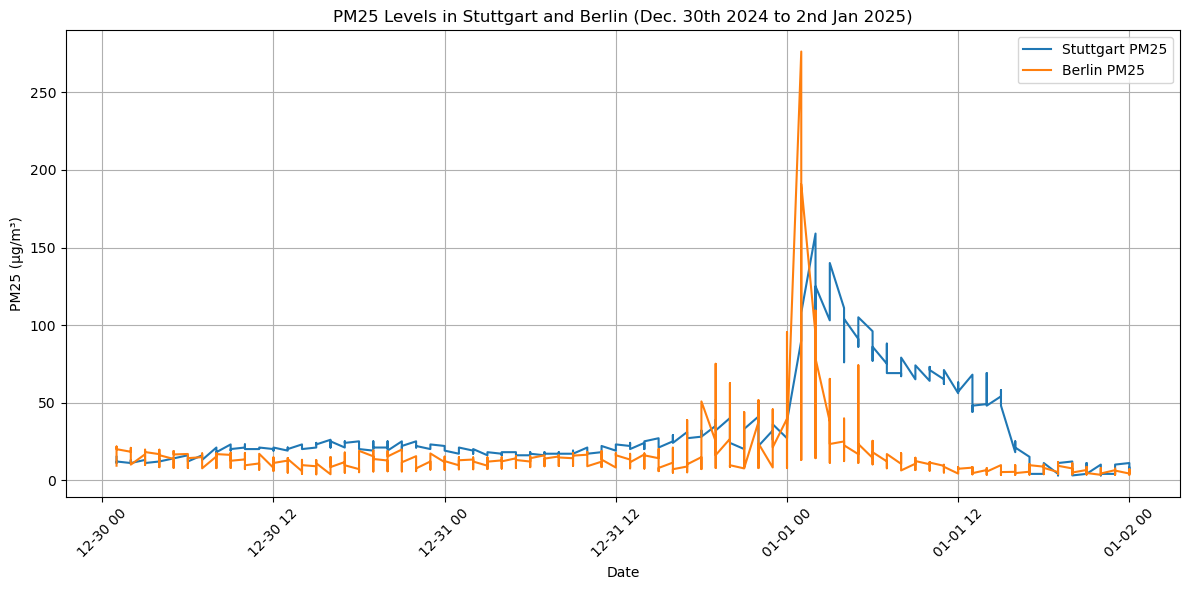

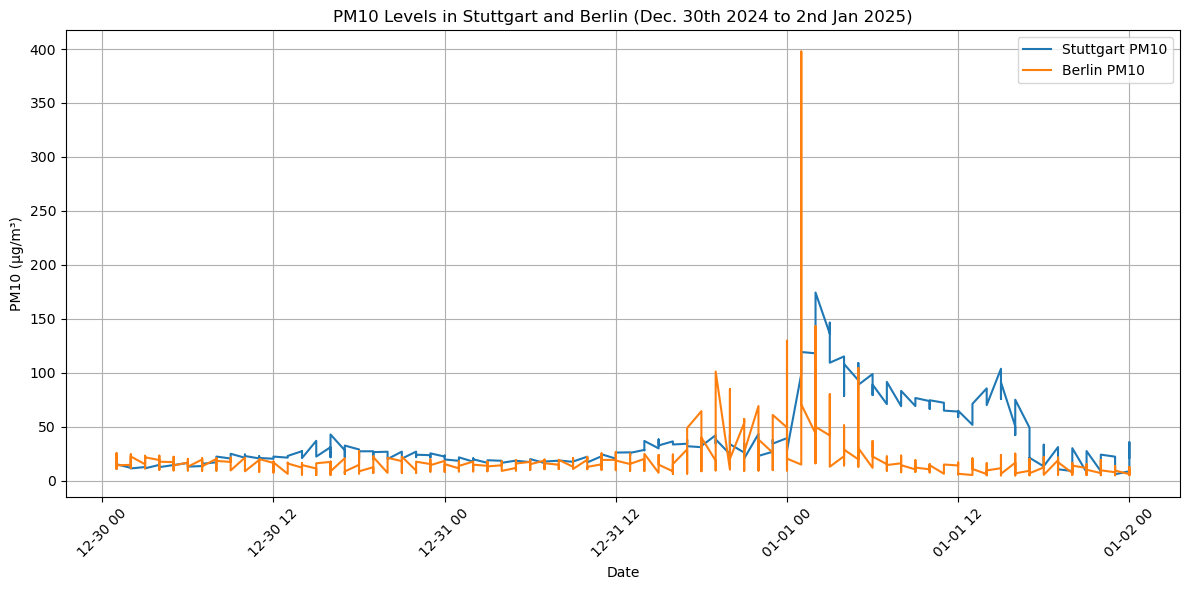

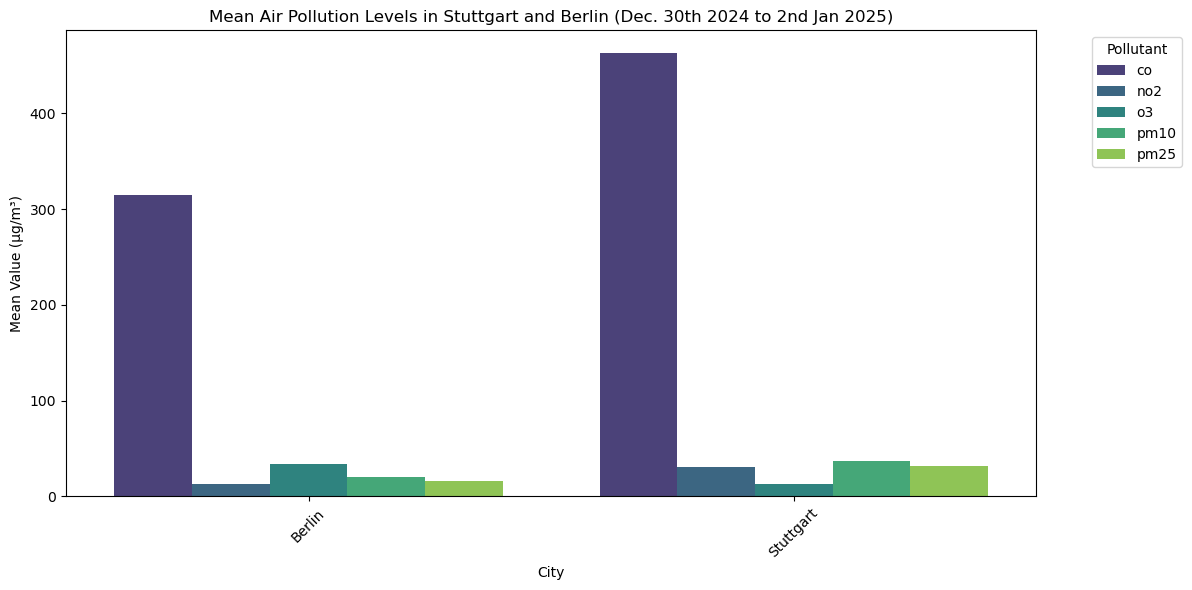

In [7]:
print("How high was the environmental pollution based on air purity, measured by the values pm25 and pm10 fpr the major cities of Berlin in Stuttgart in the period of 30th December 2024 until 2nd January 2025?")

import requests
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Define the date range for the data (for the year 2024 to 2025)
start_date = "2024-12-30"
end_date = "2025-01-02"

# API Key for OpenAQ API
api_key = "28afd69202abaa22b7faf9c0c9f25db0608ab98ebe848f47dcf57040293fb9f6"

# Base URL for OpenAQ API
url = "https://api.openaq.org/v2/measurements"

# Cities to fetch data for
cities = ["Stuttgart", "Berlin"]

# Create an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Loop through each city and fetch data
for city in cities:
    print(f"Fetching data for {city}...")
    page = 1
    while True:
        params = {
            "date_from": start_date,
            "date_to": end_date,
            "limit": 1000,
            "page": page,
            "city": city,
            "parameter[]": ["pm25", "pm10"]  # Specify relevant parameters
        }

        # Send the request to the API
        response = requests.get(url, headers={"X-API-Key": api_key}, params=params)

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()

            # Flatten the JSON data into a DataFrame
            df = json_normalize(data["results"])

            # If no data is returned, break the loop
            if df.empty:
                break

            # Parse UTC dates and clean up the DataFrame
            if "date.utc" in df.columns:
                df["datetime.utc"] = pd.to_datetime(df["date.utc"])
                df.set_index("datetime.utc", inplace=True)
                df.drop(columns=[col for col in ["date.local", "date.utc"] if col in df.columns], inplace=True)

            # Add city information to the DataFrame
            df["city"] = city

            # Combine the data into the main DataFrame
            combined_df = pd.concat([combined_df, df])

            # Increment the page number for the next request
            page += 1
        else:
            print(f"Failed to fetch data for {city}. Status code: {response.status_code}, Error: {response.text}")
            break

# Sort the combined DataFrame by datetime
combined_df.sort_index(inplace=True)

# Round all relevant values to 2 decimal places
rounded_df = combined_df.round(2)

print (rounded_df)

# Calculate mean values for each parameter grouped by city
mean_values = rounded_df.groupby(['city', 'parameter'])['value'].mean().reset_index()

# Rename the 'value' column to indicate these are mean values
mean_values.rename(columns={'value': 'mean_value'}, inplace=True)

# Create a new column to indicate these are mean values

mean_values['datetime.utc'] = pd.to_datetime('2024-12-30').tz_localize('UTC')  # Use a placeholder date for mean values

mean_values['mean'] = True  # Indicate that these are mean values

# Append the mean values to the original DataFrame

# Ensure that the columns match; if necessary, reorder or rename columns

combined_df_with_means = pd.concat([rounded_df, mean_values], ignore_index=True, sort=False)


# Sort the combined DataFrame by datetime again if needed

combined_df_with_means.sort_values(by='datetime.utc', inplace=True)


# Display the updated DataFrame with mean values

print(combined_df_with_means)

plt.figure(figsize=(12, 6))  
for city in cities:
    city_data = rounded_df[(rounded_df['city'] == city) & (rounded_df['parameter'] == 'pm25')]
    plt.plot(city_data.index, city_data['value'], label=f'{city} PM25')

plt.title('PM25 Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('Date')
plt.ylabel('PM25 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.grid() 
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))  
for city in cities:
    city_data = rounded_df[(rounded_df['city'] == city) & (rounded_df['parameter'] == 'pm10')]
    plt.plot(city_data.index, city_data['value'], label=f'{city} PM10')

plt.title('PM10 Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.grid() 
plt.tight_layout()
plt.show()

# Create a bar plot for mean values
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_values, x='city', y='mean_value', hue='parameter', palette='viridis')

# Customize the plot
plt.title('Mean Air Pollution Levels in Stuttgart and Berlin (Dec. 30th 2024 to 2nd Jan 2025)')
plt.xlabel('City')
plt.ylabel('Mean Value (µg/m³)')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()